In [1]:
import os
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import sympy
from scipy import signal
import soundfile as sf

In [82]:
#2.1.A

#1

N=7 #number of mics
c=340 #velocity of sound in air
d=0.08 #distance between mics
thita=np.pi/4 #angle of source
fs=48000 #sample rate


in00,fs00=sf.read("source.wav") #read source+mic signals 
in0,fs0=sf.read("sensor_0.wav") #in0==input of sensor_0
in1,fs1=sf.read("sensor_1.wav")
in2,fs2=sf.read("sensor_2.wav")
in3,fs3=sf.read("sensor_3.wav")
in4,fs4=sf.read("sensor_4.wav")
in5,fs5=sf.read("sensor_5.wav")
in6,fs6=sf.read("sensor_6.wav")

in_array=[] #unite all signals to one array
in_array.append(in0)
in_array.append(in1)
in_array.append(in2)
in_array.append(in3)
in_array.append(in4)
in_array.append(in5)
in_array.append(in6)
in_array.append(in00) #in_array[7]:source kai in_array[3]:signal kentrikou



w=np.linspace(0,2*np.pi*fs,len(in00)) 
dks=[]
dks_trans=[]
HT=[]
for n in range(0,7):
    result=(np.exp((-1j)*(n)*w*d*(np.cos(thita))/(c)))*(np.exp((1j)*(N-1)*w*d*(np.cos(thita))/(2*c))) #eks.17 ->
#-> apla me anapoda tous ekthetes gia na paroume suzugi
    dks.append(result)
    dks_trans.append(np.transpose(result))  #hermitian == conjugate transpose toy dks    
    HT.append(dks_trans[n]*(1/N)) #ta zitoumena vari - eksiswsi 10
#print(len(dks))
print("Τα βάρη είναι: ", HT)
#print(HT)
  
#compute the dfts of each mic_signal
#we work on the frequency domain(since convolution is turned to multiplication)
    
dft_in=[]
for i in range(0,7): 
    dft_in.append(np.fft.fft(in_array[i])) 

Y=[]
y_final=[complex(0,0) for i in range (0,len(np.real(dft_in[1])))] 
for i in range(0,7): #compute the output signal of each mic after filtering and add each one to the final result
    Y.append(dft_in[i]*dks[i]) 
    y_final+=np.fft.ifft(Y[i])  #prosthese to apotelesma sto teliko sima tou beamformer
    
    

#audio check based on noise + create the file sim_ds #keep the real part -> for sim_ds is necessary
y_final=y_final.real*(1/N) #to 1/N afora tin diairesi meta ton athroisti (vlepe sxima 3)
y_final=y_final
noise=y_final-in00
sd.play(noise,fs)
sf.write("sim_ds.wav",y_final,fs)

Τα βάρη είναι:  [array([0.14285714+0.j        , 0.14285653+0.0004195j ,
       0.14285468+0.00083899j, ..., 0.13779553-0.03769025j,
       0.13790561-0.03728545j, 0.13801451-0.03688034j]), array([0.14285714+0.j        , 0.14285687+0.00027966j,
       0.14285605+0.00055933j, ..., 0.1406001 -0.0252938j ,
       0.14064934-0.02501851j, 0.14069805-0.02474312j]), array([0.14285714+0.j        , 0.14285707+0.00013983j,
       0.14285687+0.00027966j, ..., 0.14229176-0.01269715j,
       0.14230412-0.01255787j, 0.14231635-0.01241857j]), array([0.14285714+0.j, 0.14285714+0.j, 0.14285714+0.j, ...,
       0.14285714+0.j, 0.14285714+0.j, 0.14285714+0.j]), array([0.14285714+0.j        , 0.14285707-0.00013983j,
       0.14285687-0.00027966j, ..., 0.14229176+0.01269715j,
       0.14230412+0.01255787j, 0.14231635+0.01241857j]), array([0.14285714+0.j        , 0.14285687-0.00027966j,
       0.14285605-0.00055933j, ..., 0.1406001 +0.0252938j ,
       0.14064934+0.02501851j, 0.14069805+0.02474312j]), array(

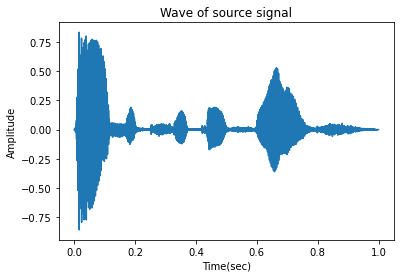

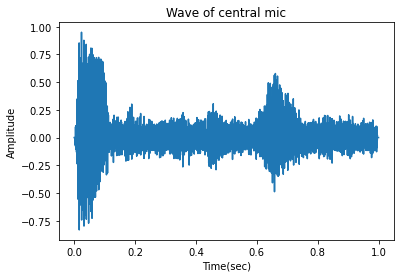

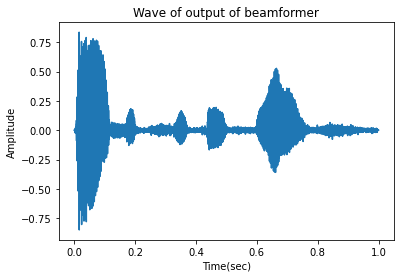

In [83]:
#2.1.A
#2
#waves

t=np.linspace(0,1,len(y_final))
plt.plot(t,in_array[7])
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Wave of source signal')
plt.show()

plt.plot(t,in_array[3])
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Wave of central mic')
plt.show()

plt.plot(t,y_final)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Wave of output of beamformer')
plt.show()

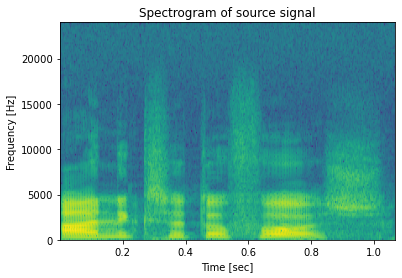

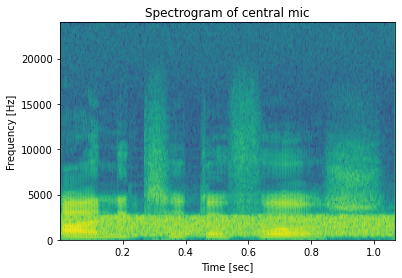

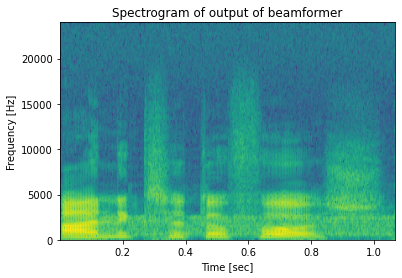

In [84]:
#2.1.A
#2
#spectrograms

plt.specgram(in_array[7],Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of source signal')
plt.show()

plt.specgram(in_array[3],Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of central mic')
plt.show()

plt.specgram(y_final,Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of output of beamformer')
plt.show()

#simperasma: spect_source kai beamformer xwris sunexi grammi stis xamiles suxnotites-> deixnei apousia thorivou

In [86]:
#2.1.A
#3
def signaltonoise_manual(a,b): #des ypodeiksi erwtimatos
    a = np.asanyarray(a) #signal_array
    b = np.asanyarray(b) #noise_array
    power_signal=0
    power_noise=0
    for i in range(0,len(a)):
        power_signal+=abs(a[i])**2 
    for j in range(0,len(b)):
        power_noise+=abs(b[j])**2
    return power_signal/power_noise #orismos snr
    

    
SNR_Central=signaltonoise_manual(in_array[3],in_array[3]-in_array[7])
SNR_Output_Beam=signaltonoise_manual(y_final,noise)
print("SNR of central mic(in) is: ",SNR_Central)
print("SNR of beamformer(out) is: ",SNR_Output_Beam)

#sumperasma: genika prepei SNR_Output_Beam>SNR_Central 

SNR of central mic(in) is:  3.0349861222340015
SNR of beamformer(out) is:  108.27276739061071


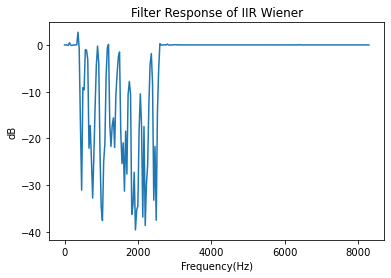

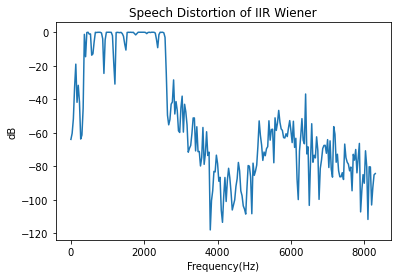

In [87]:
#2.1.B
#1
from scipy.signal.signaltools import wiener

tstart = 0.47
tend = 0.50
nstart=fs*tstart #discrete start and finish
nend=fs*tend     #x->central mic(n==3) kai s->source(clean)

s=in_array[7][int(nstart):int(nend)] #take the discrete window of the signals
x=in_array[3][int(nstart):int(nend)]

fps,Ps=sp.signal.welch(s,fs=48000,nperseg=1440, detrend=False, return_onesided=False) #compute power spectras
fpx,Px=sp.signal.welch(x,fs=48000,nperseg=1440, detrend=False, return_onesided=False)

#1400=nend-nstart==arithos_deigmatwn_parathirou



Hw=[]
for i in range(0,len(Ps)):
        Hw.append(Ps[i]/Px[i])#xrisi typou ekfwnisis

        
        
plt.plot(fps[0:250],10*np.log10(Hw[0:250]))  #[0:250] antistoixei se f=[0,8kHz] stin grafiki
plt.xlabel("Frequency(Hz)")
plt.ylabel("dB")
plt.title("Filter Response of IIR Wiener")
plt.show()

#2
nsd=[]
for i in range(0,len(Ps)):
    nsd.append((np.abs(1-Hw[i]))**2) #xrisi typou ekfwnisis
plt.plot(fpx[0:250],10*np.log10(nsd[0:250])) #se dB -> log
plt.xlabel("Frequency(Hz)")
plt.ylabel("dB")
plt.title("Speech Distortion of IIR Wiener")
plt.show()

#sumperasma gia speech distortion: meiwsi oso auksanetai i suxnotita -> anadeiknuei tin epiroi/yparksi tou thorivou
#stis ypsiles suxnotites

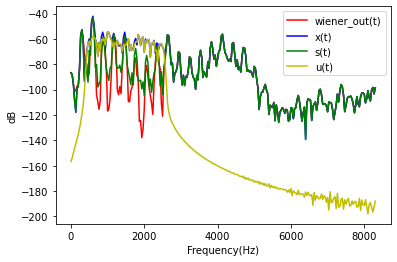

In [88]:
#2.1.B
#3

#eksodos filtrou - ulopoihsh stin suxnotita

dft_x=np.fft.fft(x)
dft_wiener=Hw*dft_x 
wiener_out=np.fft.ifft(dft_wiener) #back to discrete time domain
f_wiener_out,p_wiener_out=sp.signal.welch(wiener_out,nperseg=1440,fs=48000, detrend=False, return_onesided=False)


#x(t) kai s(t) -> idi ypologismena apo pio panw

# u(t)
u=x-s
fpu,Pu=sp.signal.welch(u,fs=48000,nperseg=1440, detrend=False, return_onesided=False)


yaxis=[p_wiener_out[0:250],Px[0:250],Ps[0:250],Pu[0:250]] #common plotting
xaxis=[f_wiener_out[0:250],fpx[0:250],fps[0:250],fpu[0:250]]
color_array=['-r','-b','-g','-y']
legend_array=['wiener_out(t)','x(t)','s(t)','u(t)']
for i in range(0,4):
    color=color_array[i]
    plt.plot(xaxis[i],10*np.log10(yaxis[i]),color)
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("dB")
    plt.legend(legend_array) 
plt.show()                   
   


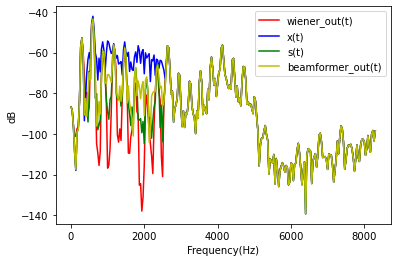

SNR of x(t)(in) is:  3.3657097876194144
SNR of wiener filter(out) is:  5.312315529592611
SNR of sample of beamformer(out) is:  112.63726498447348


In [89]:
#4

#plot the power_spectras -> already have for x(t),s(t),wiener_out(t) #omoiws me 2.1.B.3
#computing for beamformer -> xrisi parathirou sto sima yfinal

beamformer_sample=y_final[int(nstart):int(nend)]
f_beamformer,p_beamformer=sp.signal.welch(beamformer_sample,fs=48000,nperseg=1440, detrend=False, return_onesided=False)

yaxis_2=[p_wiener_out[0:250],Px[0:250],Ps[0:250],p_beamformer[0:250]] #common plotting
xaxis_2=[f_wiener_out[0:250],fpx[0:250],fps[0:250],f_beamformer[0:250]]
color_array_2=['-r','-b','-g','-y']
legend_array_2=['wiener_out(t)','x(t)','s(t)','beamformer_out(t)']
for i in range(0,4):
    color=color_array_2[i]
    plt.plot(xaxis_2[i],10*np.log10(yaxis_2[i]),color)
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("dB")
    plt.legend(legend_array_2)
plt.show() 

def signaltonoise_stat(Arr, axis=0, ddof=0): #xrisimopoieitai otan clean kai thorivwdes sima den exoun idio length
    Arr = np.asanyarray(Arr)                 #anti gia signaltonoise_manual
    me = Arr.mean(axis)
    sd = Arr.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)


SNR_Wiener_Out=signaltonoise_stat(wiener_out.real) #omoiws me 2.1.A.3 
SNR_x=signaltonoise_manual(x,u)                    #ypologismos thorivou omoiws me to erwtima 2.1.A.1
print("SNR of x(t)(in) is: ", SNR_x)               #diladi noise=signal_filter_out-source_signal_in   
print("SNR of wiener filter(out) is: ", signaltonoise_manual(wiener_out.real,wiener_out.real-s))
print("SNR of sample of beamformer(out) is: ",signaltonoise_manual(beamformer_sample,noise[int(nstart):int(nend)]))

#paratiroume mikri apoklisi tou wiener out ws pros to s(t) stis suxnotites thorivou [500,2000Hz]
#ekei proseggizei kalutera o beamformer -> endeiksi epitixous apothorivopoihshs

In [72]:
malakia

1440.0
